In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,11)})

In [38]:
data = pd.read_csv("../data/training_results.csv")

In [39]:
data.head(20)

,name,ssd,resnet,fcnn,quality,type
0,classification_loss,2.352968,0.233760,0.169422,100,bmp
1,localization_loss,1.250106,0.290874,0.247223,100,bmp
2,Bicycle,0.002146,0.000000,0.000000,100,bmp
3,Bike_Bicycle_w/out_human,NaN,NaN,NaN,100,bmp
4,Bus,0.255653,0.000000,0.289679,100,bmp
5,Ignored,NaN,NaN,NaN,100,bmp
6,Motorbike,0.000000,0.000000,0.000000,100,bmp
7,PassengerCar,0.537846,0.746674,0.771481,100,bmp
8,Pedestrian,0.060617,0.299413,0.251673,100,bmp
9,Truck,0.412823,0.498222,0.549801,100,bmp


In [40]:
data["quality"] = data["quality"].map(str) + "% " + data["type"]
data

,name,ssd,resnet,fcnn,quality,type
0,classification_loss,2.352968,0.233760,0.169422,100% bmp,bmp
1,localization_loss,1.250106,0.290874,0.247223,100% bmp,bmp
2,Bicycle,0.002146,0.000000,0.000000,100% bmp,bmp
3,Bike_Bicycle_w/out_human,NaN,NaN,NaN,100% bmp,bmp
4,Bus,0.255653,0.000000,0.289679,100% bmp,bmp
...,...,...,...,...,...,...
99,Pedestrian,0.037644,0.070079,0.000000,1% jpg,jpg
100,Truck,0.306344,0.241802,0.000000,1% jpg,jpg
101,Van,0.194870,0.068837,0.000000,1% jpg,jpg
102,mAP at 0.5IOU,0.398075,0.467492,0.000000,1% jpg,jpg


In [41]:
data_size = data["name"]=="Test+Train Data Size GB"
data_size = data[data_size]
data_size

,name,ssd,resnet,fcnn,quality,type
12,Test+Train Data Size GB,274.0,274.0,274.0,100% bmp,bmp
25,Test+Train Data Size GB,51.0,51.0,51.0,100% jpg,jpg
38,Test+Train Data Size GB,4.0,4.0,0.0,40% jpg,jpg
51,Test+Train Data Size GB,3.5,3.5,0.0,30% jpg,jpg
64,Test+Train Data Size GB,2.9,2.9,0.0,20% jpg,jpg
77,Test+Train Data Size GB,2.3,2.3,0.0,10% jpg,jpg
90,Test+Train Data Size GB,1.9,1.9,0.0,5% jpg,jpg
103,Test+Train Data Size GB,1.8,1.8,0.0,1% jpg,jpg


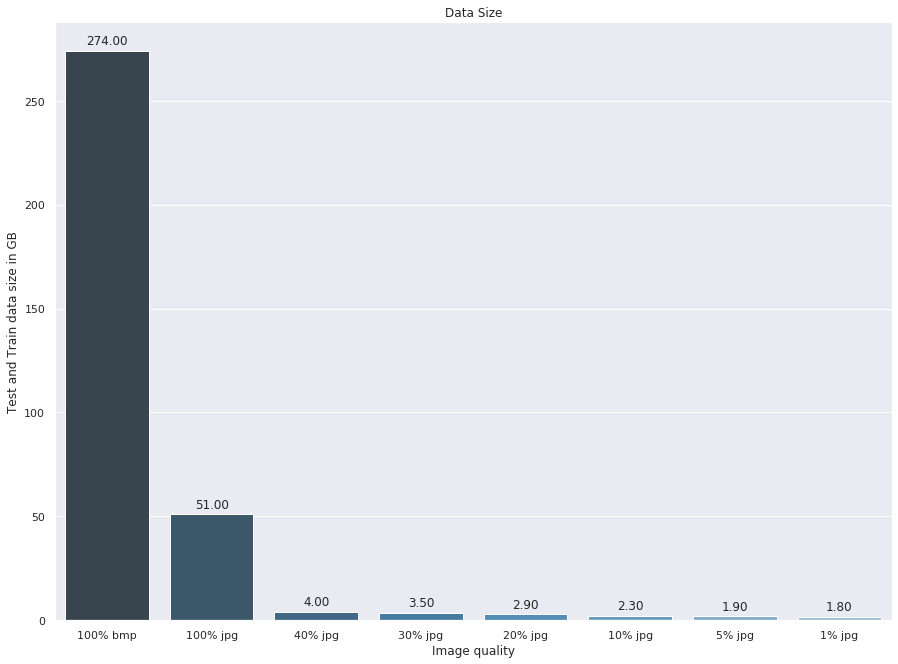

In [30]:
sns.set(rc={'figure.figsize':(15,11)})
ax = sns.barplot(x="quality", y="ssd", data=data_size, palette="Blues_d")
ax.set(xlabel='Image quality', ylabel='Test and Train data size in GB')
ax.set_title('Data Size')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig("img/data_size.png", dpi=600)

In [42]:
data_map = data["name"]=="mAP at 0.5IOU"
data_map = data[data_map]
data_map

,name,ssd,resnet,fcnn,quality,type
11,mAP at 0.5IOU,0.482949,0.675958,0.702400,100% bmp,bmp
24,mAP at 0.5IOU,0.491519,0.678267,0.701612,100% jpg,jpg
37,mAP at 0.5IOU,0.488371,0.677882,0.000000,40% jpg,jpg
50,mAP at 0.5IOU,0.482633,0.664797,0.000000,30% jpg,jpg
63,mAP at 0.5IOU,0.477106,0.663874,0.000000,20% jpg,jpg
76,mAP at 0.5IOU,0.468544,0.623507,0.000000,10% jpg,jpg
89,mAP at 0.5IOU,0.441664,0.562939,0.000000,5% jpg,jpg
102,mAP at 0.5IOU,0.398075,0.467492,0.000000,1% jpg,jpg


In [47]:
data_map_fcnn = data[(data["name"]=="mAP at 0.5IOU")&(data["fcnn"]!=0)]
data_map_fcnn

,name,ssd,resnet,fcnn,quality,type
11,mAP at 0.5IOU,0.482949,0.675958,0.702400,100% bmp,bmp
24,mAP at 0.5IOU,0.491519,0.678267,0.701612,100% jpg,jpg


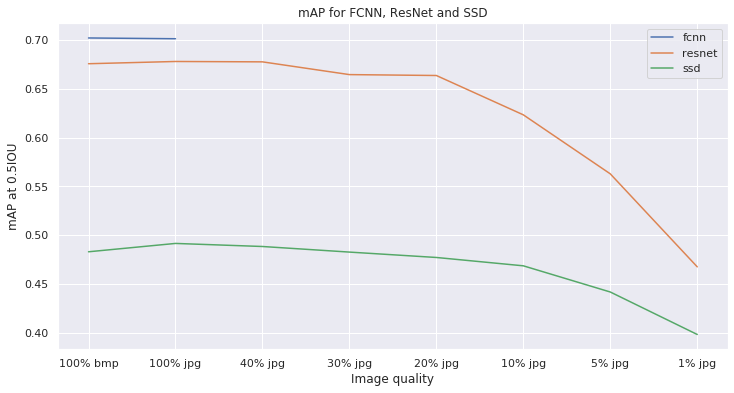

In [49]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.lineplot(x="quality", y="fcnn", data=data_map_fcnn, palette="Blues_d", sort=False, legend='full', label='fcnn')
ax = sns.lineplot(x="quality", y="resnet", data=data_map, palette="Blues_d", sort=False, legend='full', label='resnet')
ax = sns.lineplot(x="quality", y="ssd", data=data_map, palette="Blues_d", sort=False, legend='full', label='ssd')
ax.set_title('mAP for FCNN, ResNet and SSD')
ax.legend()
ax.set(xlabel='Image quality', ylabel='mAP at 0.5IOU')

plt.savefig("img/data_map_line.png", dpi=600)

In [11]:
sns.set_color_codes("pastel")

In [12]:
data_ = data["name"]=="Bike_Bicycle_w/out_human"
data_ = data[data_]
data_

,name,ssd,resnet,quality,type
3,Bike_Bicycle_w/out_human,NaN,NaN,100% bmp,bmp
16,Bike_Bicycle_w/out_human,NaN,NaN,100% jpg,jpg
29,Bike_Bicycle_w/out_human,NaN,NaN,40% jpg,jpg
42,Bike_Bicycle_w/out_human,NaN,NaN,30% jpg,jpg
55,Bike_Bicycle_w/out_human,NaN,NaN,20% jpg,jpg
68,Bike_Bicycle_w/out_human,NaN,NaN,10% jpg,jpg
81,Bike_Bicycle_w/out_human,NaN,NaN,5% jpg,jpg
94,Bike_Bicycle_w/out_human,NaN,NaN,1% jpg,jpg


In [13]:
data_ = data["name"]=="Ignored"
data_ = data[data_]
data_

,name,ssd,resnet,quality,type
5,Ignored,NaN,NaN,100% bmp,bmp
18,Ignored,NaN,NaN,100% jpg,jpg
31,Ignored,NaN,NaN,40% jpg,jpg
44,Ignored,NaN,NaN,30% jpg,jpg
57,Ignored,NaN,NaN,20% jpg,jpg
70,Ignored,NaN,NaN,10% jpg,jpg
83,Ignored,NaN,NaN,5% jpg,jpg
96,Ignored,NaN,NaN,1% jpg,jpg


In [50]:
data = data[(data["name"]!="Ignored")&(data["name"]!="Bike_Bicycle_w/out_human")]

In [51]:
data_objects = data[(data["name"]!="mAP at 0.5IOU")
            &(data["name"]!="Test+Train Data Size GB")
           &(data["name"]!="classification_loss")
           &(data["name"]!="localization_loss")]

data_objects.head()

,name,ssd,resnet,fcnn,quality,type
2,Bicycle,0.002146,0.000000,0.000000,100% bmp,bmp
4,Bus,0.255653,0.000000,0.289679,100% bmp,bmp
6,Motorbike,0.000000,0.000000,0.000000,100% bmp,bmp
7,PassengerCar,0.537846,0.746674,0.771481,100% bmp,bmp
8,Pedestrian,0.060617,0.299413,0.251673,100% bmp,bmp


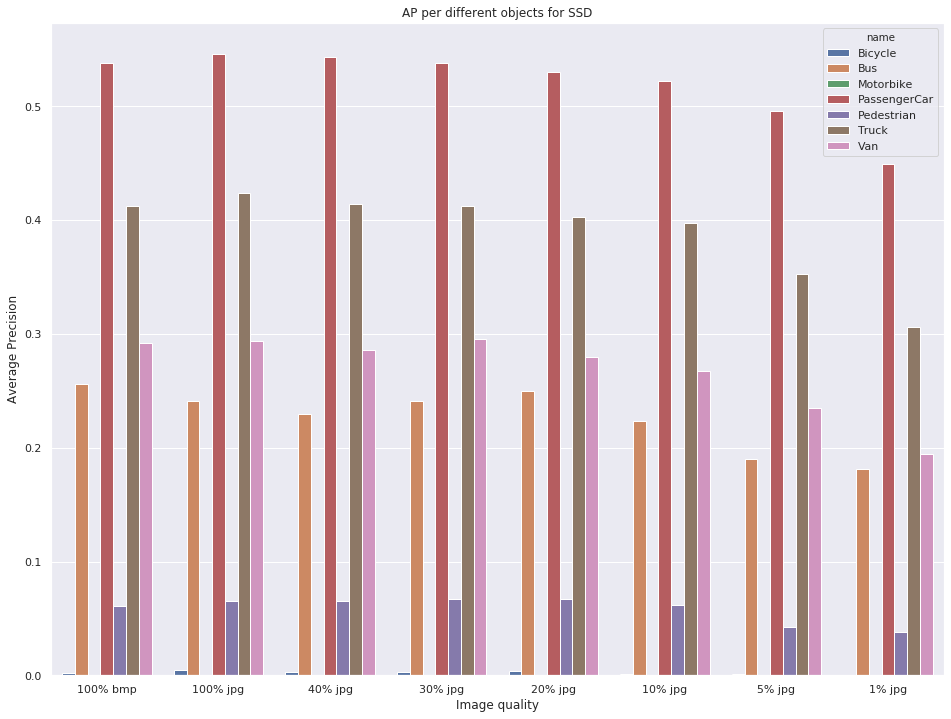

In [52]:
sns.set(rc={'figure.figsize':(16,12)})
ax = sns.barplot(x="quality", y="ssd", hue="name", data=data_objects)
ax.set(xlabel='Image quality', ylabel='Average Precision')
ax.set_title('AP per different objects for SSD')
plt.savefig("img/data_ap_objects_ssd.png", dpi=600)

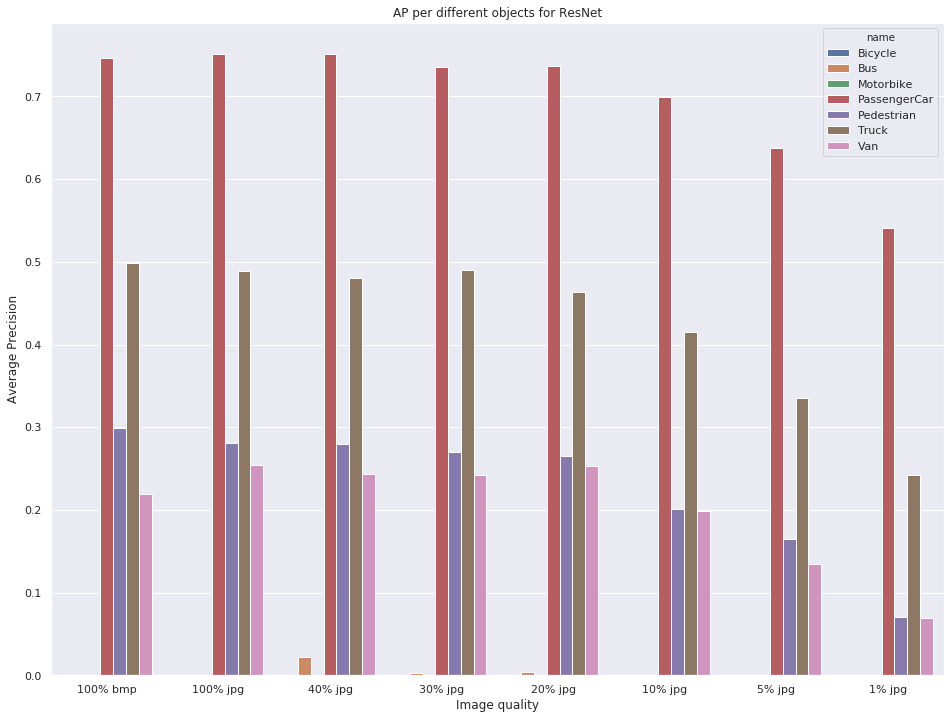

In [21]:
sns.set(rc={'figure.figsize':(16,12)})
ax = sns.barplot(x="quality", y="resnet", hue="name", data=data_objects)
ax.set(xlabel='Image quality', ylabel='Average Precision')
ax.set_title('AP per different objects for ResNet')
plt.savefig("img/data_ap_objects_resnet.png", dpi=600)

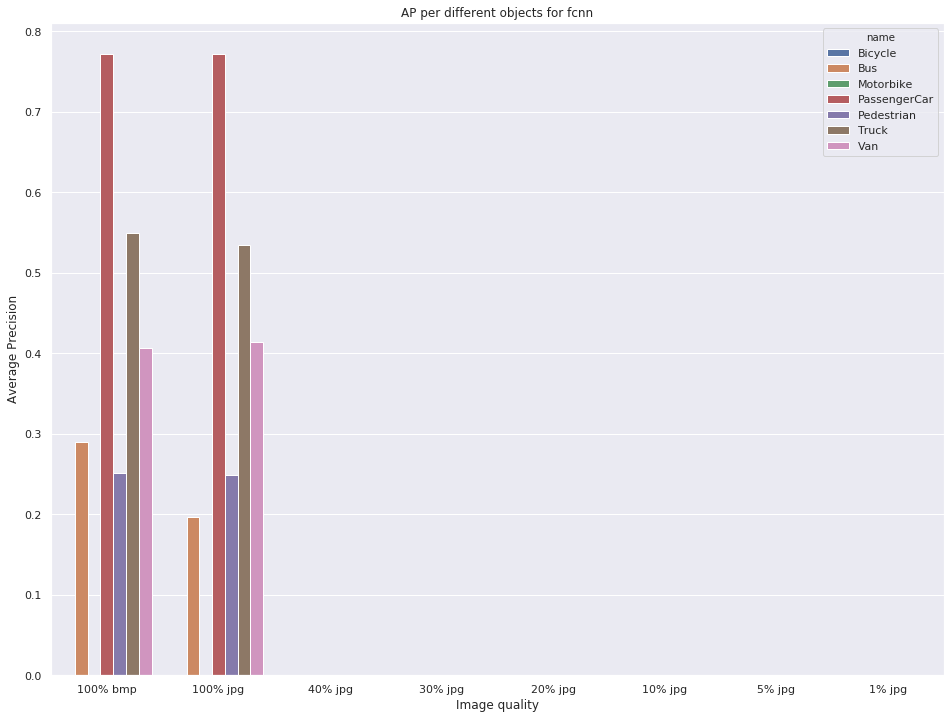

In [53]:
sns.set(rc={'figure.figsize':(16,12)})
ax = sns.barplot(x="quality", y="fcnn", hue="name", data=data_objects)
ax.set(xlabel='Image quality', ylabel='Average Precision')
ax.set_title('AP per different objects for fcnn')
plt.savefig("img/data_ap_objects_fcnn.png", dpi=600)

In [23]:
data_loss = data[data["name"]=="PassengerCar"]
df = data_loss.drop('name', axis=1)
df = df.drop('type', axis=1)
df = pd.melt(df, id_vars="quality", var_name="Model", value_name="PassengerCar AP")
df

,quality,Model,PassengerCar AP
0,100% bmp,ssd,0.537846
1,100% jpg,ssd,0.546109
2,40% jpg,ssd,0.543328
3,30% jpg,ssd,0.537884
4,20% jpg,ssd,0.530506
5,10% jpg,ssd,0.522283
6,5% jpg,ssd,0.496302
7,1% jpg,ssd,0.449259
8,100% bmp,resnet,0.746674
9,100% jpg,resnet,0.751003


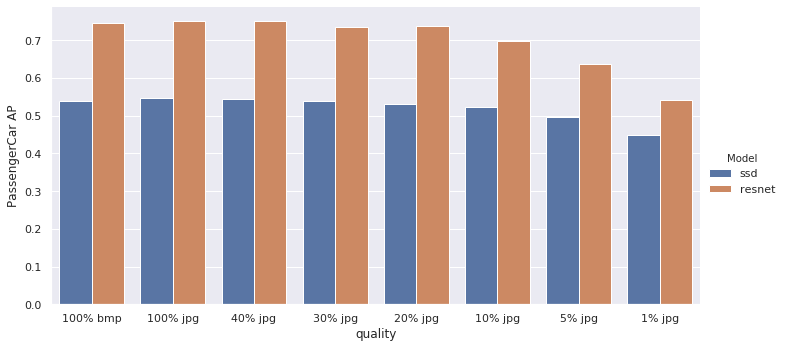

In [28]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.catplot(x='quality', y='PassengerCar AP', hue='Model', data=df, kind='bar', aspect=2, height=5)
plt.savefig("img/passenger_car.png", dpi=600)

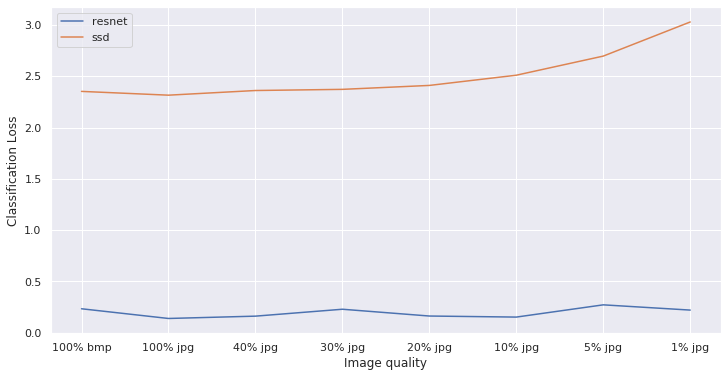

In [29]:
data_loss = data[data["name"]=="classification_loss"]
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.lineplot(x="quality", y="resnet", data=data_loss, palette="Blues_d", sort=False, legend='full', label='resnet')
ax = sns.lineplot(x="quality", y="ssd", data=data_loss, palette="Blues_d", sort=False, legend='full', label='ssd')
ax.set(xlabel='Image quality', ylabel='Classification Loss')
plt.savefig("img/data_loss_line.png", dpi=600)